# Homework 1

## FINM 36700 - 2023

### UChicago Financial Mathematics

**Professor**
* Mark Hendricks
* hendricks@uchicago.edu


**Students**

Adriana Mata <admata@uchicago.edu>

Jason Wang <jasonwang@uchicago.edu>

Sergei Tikhonov <tikhonov@uchicago.edu>

Neil Liu <xinyil2@uchicago.edu>

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

# KEY HELPER FUNCTIONS FOR SECTION 2

In [1]:
#function that creates a dataframe of excess return, volatility, and sharp ratio for indivdiual assets

def return_statistics(asset_return, period):
    
    df = pd.DataFrame({
    'Annualized_Return': asset_return.mean() * 12,
    'Annualized_Volatility': asset_return.std() * np.sqrt(12),
    'Annualized_Sharp_Ratio': (asset_return.mean() * 12) / (asset_return.std() * np.sqrt(12))})\
    .merge(descriptions, left_index=True, right_index=True)\
    .astype({'Annualized_Return': 'float', 'Annualized_Volatility': 'float', 'Annualized_Sharp_Ratio': 'float'})\
    [['shortName', 'Annualized_Return', 'Annualized_Volatility', 'Annualized_Sharp_Ratio']]
    
    return df

weight of tangency portfolio is:

$$\omega^t \equiv \frac{\Sigma^{-1}\mu}{{1^{\prime}\Sigma^{-1}\mu}}$$

In [2]:
#function that return the weights of tangency portfolio for each asset class

def calculate_tangency_portfolio(mean_returns, cov_matrix):
    
    inverted_cov_matrix = np.linalg.inv(cov_matrix)
    ones_vector = np.ones(mean_returns.shape[0])
    
    weights_tangency = (1 / (ones_vector @ inverted_cov_matrix @ mean_returns)) * inverted_cov_matrix @ mean_returns
    return weights_tangency

In [3]:
#function that creates a dataframe displaying each asset and corresponding weight in the tangency portfolio

def tangency_portfolio_df(portfolio_weights, result_stats, descriptions):

    df = pd.DataFrame(portfolio_weights, columns = ['Tangency_Portfolio_Weight'], index = result_stats.index)\
    .merge(descriptions, left_index = True, right_index = True)[['shortName', 'Tangency_Portfolio_Weight']]

    return df

$$
\mu_p = r_f + w^{\prime} \tilde{\mu}
$$

The Annualized Excess Return is:

$$
\tilde{\mu}_p = w^{\prime} \tilde{\mu}
$$

The variance is of the portfolio is:
$$\sigma^2_p = w^{\prime} \Sigma w$$

therefore:
$$\sigma_p = \sqrt{w^{\prime} \Sigma w}$$

In [4]:
#function that display a dataframe containing the excess return, vol, and sharp ratio for the entire tangency portfolio

def tangency_return_statistics(asset_return, portfolio_weights, corr, port_type, period):
    
    df = pd.DataFrame({
    'Annualized_Return': [portfolio_weights @ asset_return],
    'Annualized_Volatility': [np.sqrt(portfolio_weights @ corr @ portfolio_weights.T)*np.sqrt(period)]}, index=[port_type])\
    .assign(Annualized_Sharp_Ratio=lambda x: x['Annualized_Return'] / x['Annualized_Volatility'])

    return df

# 1. Summary Statistics

**1.1) Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)**

The analysis is based off the assumptions of annualized excesses returns and volatility from historical data for each asset. 

**Annualized Excess Return:** This is the annualized return of each asset in excess of a risk-free rate. It represents the percentage increase or decrease in the value of the asset over a specific time period, adjusted for the risk-free rate. A positive value indicates a positive return, while a negative value indicates a negative return.

$$ \text{Excess returns = Returns on investment - Returns on a risk-free investment}$$

**Annualized Volatility:** is refered as standard deviation denoted as $\sigma_i$.  This measures the level of risk or variability associated with each asset's returns over a specific time period. It is often represented as a percentage. Higher values indicate greater volatility, which means the asset's returns fluctuate more.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#file_path = r"C:\Users\jason\Portfolio and Risk Managament\HW1\multi_asset_etf_data.xlsx"
file_path = r"multi_asset_etf_data.xlsx"
descriptions = pd.read_excel(file_path, sheet_name = 'descriptions', index_col = 'ticker').loc[:,['shortName']]
descriptions #display the description of each asset

,shortName
ticker,
SPY,SPDR S&P 500
EFA,iShares MSCI EAFE ETF
EEM,iShares MSCI Emerging Index Fun
PSP,Invesco Global Listed Private E
QAI,IQ Hedge MultiIQ Hedge Multi-St
HYG,iShares iBoxx $ High Yield Corp
DBC,Invesco DB Commodity Index Trac
IYR,iShares U.S. Real Estate ETF
IEF,iShares 7-10 Year Treasury Bond


In [6]:
excess_rtrn = pd.read_excel(file_path, sheet_name = 'excess returns', index_col='Date')
excess_rtrn.head() 

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2009-04-30,0.008441,-0.001553,0.155030,0.114637,0.137907,-0.028004,0.295598,0.229650,0.022329,0.098793,-0.018505
2009-05-31,0.054143,0.163134,0.159871,0.132389,0.029026,-0.020303,0.023198,0.054363,0.028336,0.058925,0.020437
2009-06-30,0.004550,-0.026858,-0.023094,-0.014648,0.032919,-0.006170,-0.025462,0.041443,-0.004035,-0.001254,0.001383
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069217,0.008344,0.105826,0.143274,0.015353,0.074633,0.000906
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007199,0.131504,0.032977,-0.004586,0.036504,0.007979


In [7]:
result_stats = return_statistics(excess_rtrn, 12) #using return_statistics function to output corresponding statistics
result_stats 

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112
DBC,Invesco DB Commodity Index Trac,0.025443,0.178975,0.142162
EEM,iShares MSCI Emerging Index Fun,0.064887,0.196531,0.330163
EFA,iShares MSCI EAFE ETF,0.081597,0.165991,0.491573
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652
IYR,iShares U.S. Real Estate ETF,0.129473,0.187101,0.691997
PSP,Invesco Global Listed Private E,0.079938,0.227387,0.351552
QAI,IQ Hedge MultiIQ Hedge Multi-St,0.018974,0.050810,0.373440
SPY,SPDR S&P 500,0.143727,0.147679,0.973245


Now, let's provide some insights based on these results presented at the table above:

Regarding annualized excess return:
- **SPY** has the highest annualized excess return (14.37%) among the listed assets, indicating that it had a strong positive performance over the specified time period.

- **IEF** has the lowest annualized excess return (1.43%), suggesting that it had a relatively lower return compared to the other assets.

Regarding annualized volatility:
- **IYR** has the highest annualized volatility (18.71%), indicating that it experienced significant price fluctuations over the specified period.

- **IEF** has the lowest annualized volatility (6.24%), implying that it is a less volatile asset.

**1.2) Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:**
$$\text{sharpe ratio of investment }i = \frac{\tilde\mu_i}{\sigma_i}$$

The Annualized Sharpe Ratio has been computed in the previous part of the exercice, so we will solve this section based on the previous results.

**Annualized Sharpe Ratio:** The Sharpe ratio is a measure of risk-adjusted performance. It calculates the excess return (return above the risk-free rate) per unit of risk (volatility). A higher Sharpe ratio generally indicates better risk-adjusted performance.


In [8]:
sorted_sharpe_ratio = result_stats.sort_values(by = 'Annualized_Sharp_Ratio', ascending = False)
sorted_sharpe_ratio 

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
SPY,SPDR S&P 500,0.143727,0.147679,0.973245
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746
IYR,iShares U.S. Real Estate ETF,0.129473,0.187101,0.691997
EFA,iShares MSCI EAFE ETF,0.081597,0.165991,0.491573
TIP,iShares TIPS Bond ETF,0.022321,0.051529,0.433166
QAI,IQ Hedge MultiIQ Hedge Multi-St,0.018974,0.050810,0.373440
PSP,Invesco Global Listed Private E,0.079938,0.227387,0.351552
EEM,iShares MSCI Emerging Index Fun,0.064887,0.196531,0.330163
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652
DBC,Invesco DB Commodity Index Trac,0.025443,0.178975,0.142162


In [9]:
max_sr = result_stats.nlargest(1, 'Annualized_Sharp_Ratio')
min_sr = result_stats.nsmallest(1, 'Annualized_Sharp_Ratio')
pd.concat([max_sr, min_sr])

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
SPY,SPDR S&P 500,0.143727,0.147679,0.973245
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112


From the data shown below, **BWX**, or SPDR Bloomberg International Treasury Bonds ETF has the worst sharp ratio of -0.022 given negative excess return. Equity (S&P 500) has been the best performing asset for from both a high return and low volatility perspective. **SPY** has low vol because it is well diversifed amongst different companies from different sectors. Albeit SPDR is lower vol (which is generally the case for treasury bonds), rate hikes in recent years has mostly depressed bond returns. 

# 2. Descriptive Analysis
**2.1) Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?**

The **correlation matrix** is a fundamental tool for stock market investors since it describes how closely the returns of the assets in a portfolio are correlated.

- $\Sigma$ denote the covariance matrix of the assets. This matrix is *positive semi-definite* (p.s.d.), which we denote $\Sigma \geq 0$. This property ensures that each of the diagonal elements of $V[x]$ are non-negative.

In [10]:
result_stats

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112
DBC,Invesco DB Commodity Index Trac,0.025443,0.178975,0.142162
EEM,iShares MSCI Emerging Index Fun,0.064887,0.196531,0.330163
EFA,iShares MSCI EAFE ETF,0.081597,0.165991,0.491573
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652
IYR,iShares U.S. Real Estate ETF,0.129473,0.187101,0.691997
PSP,Invesco Global Listed Private E,0.079938,0.227387,0.351552
QAI,IQ Hedge MultiIQ Hedge Multi-St,0.018974,0.050810,0.373440
SPY,SPDR S&P 500,0.143727,0.147679,0.973245


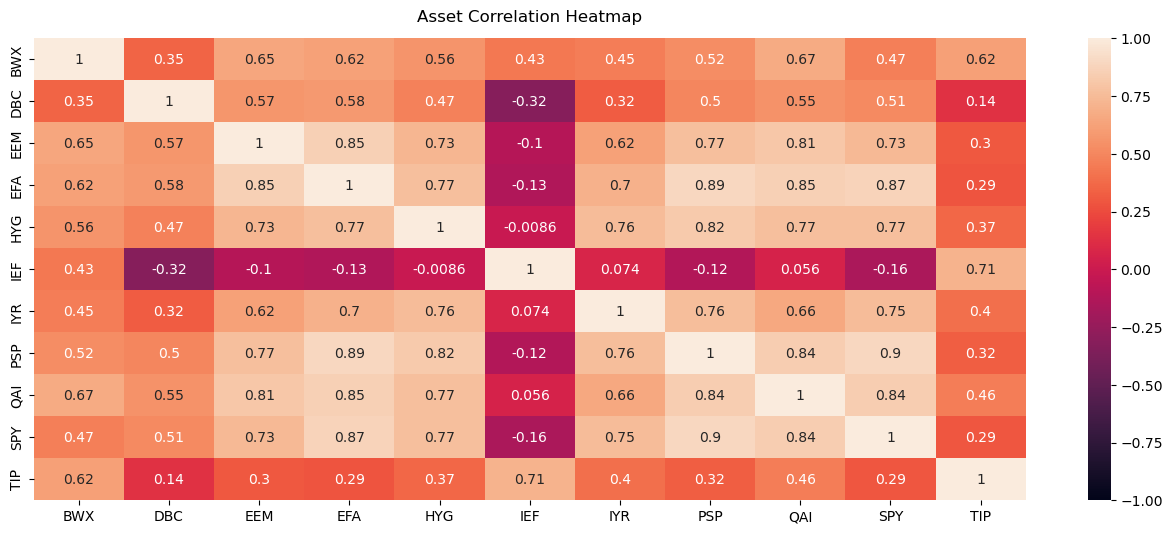

In [11]:
asset_corr = excess_rtrn.corr()
plt.figure(figsize = (16,6))
heatmap = sns.heatmap(asset_corr, vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Asset Correlation Heatmap', fontdict={'fontsize': 12}, pad = 12);

In [12]:
sorted_corr = asset_corr.unstack().sort_values().to_frame('Correlations')
sorted_corr = sorted_corr[sorted_corr['Correlations'] != 1]

max_corr = sorted_corr.nlargest(1, 'Correlations')
min_corr = sorted_corr.nsmallest(1, 'Correlations')
pd.concat([max_corr, min_corr])

,,Correlations
SPY,PSP,0.895729
DBC,IEF,-0.321738


The Correlation matrix has been presented in a heat map format since this way is more intuitive to interpret the results and identify possible outliers. 

The provided results show the highest and lowest correlation pairs along with their correlation values based on a correlation matrix of returns. Let's break down these results and explain their significance:

**Highest Correlation Pair: ('SPY', 'PSP') (Correlation: 0.896)**
- This result indicates that the pair of assets 'SPY' (likely the SPDR S&P 500 ETF) and 'PSP' (likely the Invesco Global Listed Private Equity ETF) has the highest positive correlation among all the asset pairs in the correlation matrix.
- The correlation value of 0.896 is very close to 1, which suggests a strong positive linear relationship between the returns of 'SPY' and 'PSP.'
- In practical terms, when the returns of 'SPY' increase, the returns of 'PSP' tend to increase as well, and vice versa. These two assets may have similar market dynamics or underlying factors affecting their returns.

**Lowest Correlation Pair: ('IEF', 'DBC') (Correlation: -0.322)**
- This result indicates that the pair of assets 'IEF' (likely the iShares 7-10 Year Treasury Bond ETF) and 'DBC' (likely the Invesco DB Commodity Index Tracking ETF) has the lowest correlation among all the asset pairs in the correlation matrix.
- The negative correlation value of -0.322 suggests an inverse relationship between the returns of 'IEF' and 'DBC.' When the returns of one asset increase, the returns of the other tend to decrease.
- This negative correlation could be indicative of a potential diversification benefit. Investors often seek assets with low or negative correlations to build diversified portfolios that can potentially reduce overall portfolio risk.

In summary, the highest correlation pair ('SPY', 'PSP') indicates a strong positive relationship between the returns of two assets, while the lowest correlation pair ('IEF', 'DBC') suggests an inverse relationship. 

Understanding the correlations between assets is essential for portfolio construction and risk management, as it helps investors assess how different assets may behave relative to each other and make informed investment decisions.


**2.2) How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?**

In [13]:
TIPS_Sharpe = float(result_stats[result_stats.index.isin(['TIP'])]['Annualized_Sharp_Ratio'])
result_stats_outperf = result_stats.assign(Outperform_TIPS = lambda x: np.where(x['Annualized_Sharp_Ratio'] >= TIPS_Sharpe, True, False))

#display with domest bonds only (show BWX, HYG, IEF, TIP)
result_stats_outperf[result_stats.index.isin(['IEF','BWX','HYG','TIP'])]

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio,Outperform_TIPS
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112,False
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746,True
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652,False
TIP,iShares TIPS Bond ETF,0.022321,0.051529,0.433166,True


To evaluate how well TIPS (Treasury Inflation-Protected Securities) have performed in the provided sample and whether they have outperformed domestic bonds and foreign bonds, let's analyze the data:

**TIPS vs. Foreign Bonds (BWX):**
- TIPS (TIP) have provided a positive annualized excess return (2.23%), while foreign bonds (BWX) have posted a negative return (-0.18%).
- TIPS have a positive annualized Sharpe ratio (0.4332), indicating positive risk-adjusted performance, while foreign bonds have a negative Sharpe ratio (-0.0221).
- TIPS have lower annualized volatility (5.15%) compared to foreign bonds (8.34%).

Based on the provided criteria ("Outperform_TIPS"), TIPS have outperformed foreign bonds.

**TIPS vs. High-Yield Corporate Bonds (HYG):**
- TIPS (TIP) have provided a lower annualized excess return (2.23%) compared to high-yield corporate bonds (HYG) (6.42%). High-yield corporate bonds have outperformed TIPS in terms of raw returns.
- High-yield corporate bonds (HYG) have a higher annualized Sharpe ratio (0.7197) compared to TIPS (0.4332), indicating better risk-adjusted performance.
- High-yield corporate bonds (HYG) also have higher annualized volatility (8.92%) compared to TIPS (5.15%), indicating higher risk.

Based on the provided criteria ("Outperform_TIPS"), high-yield corporate bonds have outperformed TIPS.

**TIPS vs. Domestic Bonds (IEF):**
- TIPS (TIP) have provided a higher annualized excess return (2.23%) compared to domestic bonds (IEF) (1.43%). TIPS have outperformed domestic bonds in terms of excess raw returns.
- TIPS also have a higher annualized Sharpe ratio (0.4332) compared to domestic bonds (0.2287), indicating better risk-adjusted performance.
- Additionally, TIPS have lower annualized volatility (5.15%) compared to domestic bonds (6.24%), which means they have been less volatile.

Based on the provided criteria ("Outperform_TIPS"), TIPS have outperformed domestic bonds.

# 3. MV Frontier
**3.1) Compute and display the weights of the tangency portfolios: $\omega^{t}$.**

The **tangency portfolio** is the portfolio of risky assets that has the highest Sharpe ratio.

$$\omega^{t} = \left(\frac{1}{1'\Sigma^{-1}\tilde{\mu}}\right) \cdot \Sigma^{-1}\tilde{\mu}$$

In [14]:
mean_return = np.array(result_stats['Annualized_Return'])
weights = calculate_tangency_portfolio(mean_return, excess_rtrn.cov())

In [15]:
portfolio_df = tangency_portfolio_df(weights, result_stats, descriptions)
portfolio_df

,shortName,Tangency_Portfolio_Weight
BWX,SPDR Bloomberg International Tr,-1.464974
DBC,Invesco DB Commodity Index Trac,0.028436
EEM,iShares MSCI Emerging Index Fun,0.261028
EFA,iShares MSCI EAFE ETF,0.452914
HYG,iShares iBoxx $ High Yield Corp,1.528942
IEF,iShares 7-10 Year Treasury Bond,1.893992
IYR,iShares U.S. Real Estate ETF,-0.242772
PSP,Invesco Global Listed Private E,-1.271055
QAI,IQ Hedge MultiIQ Hedge Multi-St,-3.133445
SPY,SPDR S&P 500,2.589999


The **Tangency Portfolio Weights** determine the allocation of each asset within the portfolio. Positive weights indicate the percentage of the portfolio allocated to the asset, while negative weights represent short positions (borrowing to invest) in the asset. The weights are optimized to maximize the portfolio's risk-adjusted return.

Analyzing the results futher, it can be seen that **SPY** (SPDR S&P 500) has the highest positive weight in the portfolio (2.589). This suggests that a significant portion of the portfolio is allocated to the U.S. stock market represented by the S&P 500. Unlike, **IYR**, **PSP**, **BWX** and **QAI** have negative weights, indicating that the portfolio has short positions in these assets. Short positions involve borrowing assets to sell them with the expectation of buying them back at a lower price in the future.

**3.2) Does the ranking of weights align with the ranking of Sharpe ratios?**

In [16]:
sorted_tangency_port = portfolio_df.sort_values(by = 'Tangency_Portfolio_Weight', ascending = False)
sorted_tangency_port

,shortName,Tangency_Portfolio_Weight
SPY,SPDR S&P 500,2.589999
IEF,iShares 7-10 Year Treasury Bond,1.893992
HYG,iShares iBoxx $ High Yield Corp,1.528942
EFA,iShares MSCI EAFE ETF,0.452914
TIP,iShares TIPS Bond ETF,0.356935
EEM,iShares MSCI Emerging Index Fun,0.261028
DBC,Invesco DB Commodity Index Trac,0.028436
IYR,iShares U.S. Real Estate ETF,-0.242772
PSP,Invesco Global Listed Private E,-1.271055
BWX,SPDR Bloomberg International Tr,-1.464974


In [17]:
largest_weight = sorted_tangency_port.nlargest(1, 'Tangency_Portfolio_Weight')
smallest_weight = sorted_tangency_port.nsmallest(1, 'Tangency_Portfolio_Weight')
pd.concat([largest_weight, smallest_weight])

,shortName,Tangency_Portfolio_Weight
SPY,SPDR S&P 500,2.589999
QAI,IQ Hedge MultiIQ Hedge Multi-St,-3.133445


In [18]:
#Comparison of ranking between Tangency Porfolio Weight, which shows that the results are not the same
combined_table = portfolio_df.join(result_stats[['Annualized_Sharp_Ratio']])
combined_table.sort_values(by = 'Tangency_Portfolio_Weight', ascending = False)

,shortName,Tangency_Portfolio_Weight,Annualized_Sharp_Ratio
SPY,SPDR S&P 500,2.589999,0.973245
IEF,iShares 7-10 Year Treasury Bond,1.893992,0.228652
HYG,iShares iBoxx $ High Yield Corp,1.528942,0.719746
EFA,iShares MSCI EAFE ETF,0.452914,0.491573
TIP,iShares TIPS Bond ETF,0.356935,0.433166
EEM,iShares MSCI Emerging Index Fun,0.261028,0.330163
DBC,Invesco DB Commodity Index Trac,0.028436,0.142162
IYR,iShares U.S. Real Estate ETF,-0.242772,0.691997
PSP,Invesco Global Listed Private E,-1.271055,0.351552
BWX,SPDR Bloomberg International Tr,-1.464974,-0.022112


The alignment between the ranking of weights in the Tangency Portfolio and the ranking of Sharpe ratios is not perfect. Some assets have aligned rankings, where higher weights correspond to higher Sharpe ratios, while others have mismatches.

It's important to note that the Tangency Portfolio optimization process aims to maximize the overall Sharpe ratio of the portfolio, considering the correlation and risk-return characteristics of each asset. Therefore, the resulting weights are optimized for the portfolio's overall risk-adjusted return rather than individual asset Sharpe ratios.

**3.3) Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\omega^{t}$.**

The **mean of the portfolio's excess return** is calculated as the weighted sum of the assets' excess returns, where the weights are given by $\omega^{t}$. This can be expressed as:

$$\text{Mean} = \tilde{\mu}^p = \Sigma_{i} \omega^{t}_i \cdot \text{Annualized Excess Return}_i = \omega' \tilde{\mu} $$

The **portfolio's volatility**, or standard deviation, measures its risk. It is calculated as the square root of the portfolio's variance, which is a function of the asset weights and their covariances. The formula for portfolio variance is:

$$ \text{Portfolio Variance} = \Sigma_{i} \Sigma_{j} \left(\omega^{t}_i \cdot \omega^{t}_j \cdot \text{Covariance}_{ij} \right)$$

The portfolio's volatility is then:
$$\text{Volatility} = \sqrt{\text{Portfolio Variance}} = \sqrt{\omega' \Sigma \omega} $$
 
The **Sharpe ratio** measures the risk-adjusted return of the portfolio and is calculated as the ratio of the portfolio's mean excess return to its volatility. The formula is:
$$ \text{Sharpe Ratio} = \frac{\text{Mean}}{\text{Volatility}} = \frac{\tilde{\mu}^p}{\sqrt{\omega' \Sigma \omega}} $$

Now, let's compute these values for the tangency portfolio using the given weights $\omega^{t}$ and the provided data for asset returns and covariances. This will give us a measure of how well the portfolio has performed in terms of its risk-adjusted return.

In [19]:
tangency_results_stats = tangency_return_statistics(mean_return, weights, excess_rtrn.cov(), 'Tangency Portfolio', 12)
tangency_results_stats

,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
Tangency Portfolio,0.37018,0.191523,1.932824


* The Tangency Portfolio is expected to generate a positive annualized return, indicating that it has the potential to deliver profits to investors.
* The Sharpe Ratio of 1.933 indicates that the portfolio's risk-adjusted return is positive and relatively high. 

In summary, the Tangency Portfolio has the potential to deliver positive returns, but investors should be aware of the relatively high risk associated with the portfolio. The Sharpe Ratio provides a measure of the trade-off between return and risk, and in this case, it suggests a relatively modest risk-adjusted return.





# 4. TIPS
Assess how much the tangency portfolio (and performance) change if...

* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.


Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

End Goal: create comparison tables for TIPS, Adjusted-TIPS, with TIPs

## no TIPs calculation:

In [20]:
excess_rtrn_no_TIPs = excess_rtrn.drop(columns = 'TIP', axis = 1)
excess_rtrn_no_TIPs.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY
Date,,,,,,,,,,
2009-04-30,0.008441,-0.001553,0.155030,0.114637,0.137907,-0.028004,0.295598,0.229650,0.022329,0.098793
2009-05-31,0.054143,0.163134,0.159871,0.132389,0.029026,-0.020303,0.023198,0.054363,0.028336,0.058925
2009-06-30,0.004550,-0.026858,-0.023094,-0.014648,0.032919,-0.006170,-0.025462,0.041443,-0.004035,-0.001254
2009-07-31,0.031312,0.018595,0.110173,0.100442,0.069217,0.008344,0.105826,0.143274,0.015353,0.074633
2009-08-31,0.007193,-0.040800,-0.013571,0.044595,-0.017404,0.007199,0.131504,0.032977,-0.004586,0.036504


In [21]:
result_stats_no_TIPs = return_statistics(excess_rtrn_no_TIPs, 12)
result_stats_no_TIPs

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112
DBC,Invesco DB Commodity Index Trac,0.025443,0.178975,0.142162
EEM,iShares MSCI Emerging Index Fun,0.064887,0.196531,0.330163
EFA,iShares MSCI EAFE ETF,0.081597,0.165991,0.491573
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652
IYR,iShares U.S. Real Estate ETF,0.129473,0.187101,0.691997
PSP,Invesco Global Listed Private E,0.079938,0.227387,0.351552
QAI,IQ Hedge MultiIQ Hedge Multi-St,0.018974,0.050810,0.373440
SPY,SPDR S&P 500,0.143727,0.147679,0.973245


In [22]:
mean_return_no_TIPs = np.array(result_stats_no_TIPs['Annualized_Return'])
weights_no_TIPs = calculate_tangency_portfolio(mean_return_no_TIPs, excess_rtrn_no_TIPs.cov()) 

portfolio_df_no_TIPs = tangency_portfolio_df(weights_no_TIPs, result_stats_no_TIPs, descriptions)
portfolio_df_no_TIPs.sort_values(by = "Tangency_Portfolio_Weight", ascending = False)

,shortName,Tangency_Portfolio_Weight
SPY,SPDR S&P 500,2.731363
IEF,iShares 7-10 Year Treasury Bond,2.212451
HYG,iShares iBoxx $ High Yield Corp,1.593140
EFA,iShares MSCI EAFE ETF,0.441496
EEM,iShares MSCI Emerging Index Fun,0.278086
DBC,Invesco DB Commodity Index Trac,0.055158
IYR,iShares U.S. Real Estate ETF,-0.245895
PSP,Invesco Global Listed Private E,-1.314092
BWX,SPDR Bloomberg International Tr,-1.512750
QAI,IQ Hedge MultiIQ Hedge Multi-St,-3.238956


In [23]:
tangency_results_stats_no_TIPs = tangency_return_statistics(mean_return_no_TIPs, weights_no_TIPs, excess_rtrn_no_TIPs.cov(), 'Tangency Portfolio with no TIPs', 12)
tangency_results_stats_no_TIPs

,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
Tangency Portfolio with no TIPs,0.386291,0.200111,1.930383


## Adjusted TIPs calculation:

In [24]:
result_stats_scaled_TIPs = result_stats.copy()
result_stats_scaled_TIPs.loc[result_stats_scaled_TIPs['shortName'] == 'iShares TIPS Bond ETF', 
                             'Annualized_Return'] += 0.0012 * 12
result_stats_scaled_TIPs

,shortName,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
BWX,SPDR Bloomberg International Tr,-0.001843,0.083359,-0.022112
DBC,Invesco DB Commodity Index Trac,0.025443,0.178975,0.142162
EEM,iShares MSCI Emerging Index Fun,0.064887,0.196531,0.330163
EFA,iShares MSCI EAFE ETF,0.081597,0.165991,0.491573
HYG,iShares iBoxx $ High Yield Corp,0.064168,0.089154,0.719746
IEF,iShares 7-10 Year Treasury Bond,0.014269,0.062405,0.228652
IYR,iShares U.S. Real Estate ETF,0.129473,0.187101,0.691997
PSP,Invesco Global Listed Private E,0.079938,0.227387,0.351552
QAI,IQ Hedge MultiIQ Hedge Multi-St,0.018974,0.050810,0.373440
SPY,SPDR S&P 500,0.143727,0.147679,0.973245


In [25]:
mean_return_scaled_TIPs = np.array(result_stats_scaled_TIPs['Annualized_Return'])
weights_scaled_TIPs = calculate_tangency_portfolio(mean_return_scaled_TIPs, excess_rtrn.cov()) 
portfolio_df_scaled_TIPs = tangency_portfolio_df(weights_scaled_TIPs, result_stats_scaled_TIPs, descriptions)
portfolio_df_scaled_TIPs.sort_values(by = "Tangency_Portfolio_Weight", ascending = False)

,shortName,Tangency_Portfolio_Weight
SPY,SPDR S&P 500,1.991970
TIP,iShares TIPS Bond ETF,1.866922
HYG,iShares iBoxx $ High Yield Corp,1.257360
IEF,iShares 7-10 Year Treasury Bond,0.546774
EFA,iShares MSCI EAFE ETF,0.501217
EEM,iShares MSCI Emerging Index Fun,0.188865
DBC,Invesco DB Commodity Index Trac,-0.084605
IYR,iShares U.S. Real Estate ETF,-0.229559
PSP,Invesco Global Listed Private E,-1.088989
BWX,SPDR Bloomberg International Tr,-1.262864


In [26]:
tangency_results_stats_scaled_TIPs = tangency_return_statistics(mean_return_scaled_TIPs, weights_scaled_TIPs, excess_rtrn.cov(), 'Tangency Porfolio with Adj TIPs' , 12)
tangency_results_stats_scaled_TIPs

,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
Tangency Porfolio with Adj TIPs,0.328908,0.161947,2.030967


## Comparison between three tangency portfolios (TIPs, no TIPs, Adjusted TIPs)

In [27]:
comparison = pd.concat([tangency_results_stats, tangency_results_stats_no_TIPs, tangency_results_stats_scaled_TIPs])
comparison

,Annualized_Return,Annualized_Volatility,Annualized_Sharp_Ratio
Tangency Portfolio,0.370180,0.191523,1.932824
Tangency Portfolio with no TIPs,0.386291,0.200111,1.930383
Tangency Porfolio with Adj TIPs,0.328908,0.161947,2.030967


1. The Tangency Portfolio with no TIPs has the highest annualized return at 38.63%, followed closely by the Tangency Portfolio at 37.02%. This suggests that the removal of TIPs from the portfolio has slightly improved its returns.
	
	
	
2. Despite having a slightly lower return, the Tangency Portfolio with Adjusted TIPs stands out with the lowest annualized volatility at 16.19%. This indicates that the adjusted TIPs have reduced the portfolio's overall risk.
	
	
	
3. The Tangency Portfolio with Adjusted TIPs also boasts the highest annualized Sharpe ratio at 2.03. The Sharpe ratio measures the risk-adjusted return, and a higher value indicates a more efficient portfolio in terms of risk and return.
	
	
	
4. Investors seeking a balance between risk and return may find the Tangency Portfolio with Adjusted TIPs to be an attractive option due to its superior risk-adjusted performance. 
	
	
	
5. The Tangency Portfolio with no TIPs offers slightly higher returns but comes with higher volatility, resulting in a similar Sharpe ratio to the original Tangency Portfolio. Investors with a higher risk tolerance may prefer this option for its potential upside

***

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [28]:
def calculate_tangency_portfolio(mean_returns, cov_matrix):
    inverted_cov_matrix = np.linalg.inv(cov_matrix)
    ones_vector = np.ones(mean_returns.shape[0])
    
    weights_tangency = (1 / (ones_vector @ inverted_cov_matrix @ mean_returns)) * inverted_cov_matrix @ mean_returns
    return weights_tangency

In [29]:
def mvo_performance_stats(mean_returns, cov_matrix, port_weights, allocation):

    ret = port_weights @ mean_returns
    vol = np.sqrt(port_weights @ cov_matrix @ port_weights.T) * np.sqrt(12)
    sharpe = ret / vol

    stats = pd.DataFrame([[ret, vol, sharpe]] 
                         ,columns= ["Annualized Return", "Annualized Volatility", "Annualized Sharpe Ratio"],
                         index = [allocation])
    return stats

In [30]:
targeted_return = 0.01

mean_returns = result_stats['Annualized_Return']
cov_matrix = excess_rtrn.cov()

#### Tangency 

Calculate the tangency weighting vector that is the result of Sharpe Ratio maximization:

$$
\wtan = \frac{1}{\textbf{1} \Sigma \mu} \Sigma \mu 
$$

In [31]:
weights_tangency = calculate_tangency_portfolio(mean_returns, cov_matrix)

eq0_rescale_factor = targeted_return * 12 / (weights_tangency.T @ mean_returns)

eq0_stats = mvo_performance_stats(mean_returns, cov_matrix, weights_tangency * eq0_rescale_factor, 
                                  'Tangency Portfolio')
eq0_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,0.12,0.062085,1.932824


#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

In [32]:
equal_weights = np.array(len(cov_matrix.index) * [1 / len(cov_matrix.index)])
eql_rescale_factor = targeted_return * 12 / (equal_weights.T @ mean_returns)

eq1_stats = mvo_performance_stats(mean_returns, cov_matrix, (equal_weights * eql_rescale_factor),
                                          'Equal Weight Portfolio')
eq1_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Equal Weight Portfolio,0.12,0.213275,0.562655


#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

In [33]:
risk_par_weights = np.array(1 / result_stats['Annualized_Volatility'] ** 2)
eq2_rescale_factor = targeted_return * 12 / (risk_par_weights.T @ mean_returns)

eq2_stats = mvo_performance_stats(mean_returns, cov_matrix, (risk_par_weights * eq2_rescale_factor),
                                          'Risk Parity Portfolio')
eq2_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Risk Parity Portfolio,0.12,0.217685,0.551256


#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 

In [34]:
cov_matrix_reg = (cov_matrix + np.diag(np.diag(cov_matrix))) / 2


weights_reg = calculate_tangency_portfolio(mean_returns, cov_matrix_reg)
eq3_rescale_factor = targeted_return * 12 / (weights_reg.T @ mean_returns)

eq3_stats = mvo_performance_stats(mean_returns, cov_matrix_reg, (weights_reg * eq3_rescale_factor),
                                          'Regularized Portfolio')
eq3_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Regularized Portfolio,0.12,0.096631,1.241837


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [35]:
comparison = pd.concat([eq0_stats, eq1_stats, eq2_stats, eq3_stats])
comparison

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio,0.12,0.062085,1.932824
Equal Weight Portfolio,0.12,0.213275,0.562655
Risk Parity Portfolio,0.12,0.217685,0.551256
Regularized Portfolio,0.12,0.096631,1.241837


**Results**:

1. Tangency Portfolio, as a result of Sharpe ratio maximization, has the lowest annualized volatility (with respect to normalized returns) among all other portfolios and the highest annualized Sharpe ratio as a direct result of maximization.

2. Both Equal Weight Portfolio and Risk Parity Portfolio have approximately the same annualized volatilities, which are the highest volatilities among all other portfolios. The result is expected: as for Equal Weight Portfolio, we just assume that all asset classes have the same weights, so we don't take into account risks and returns associated with them; as for Risk Parity Portfolio, the weigths of assets with high volatility are lower than those with low volatility, but the assets with low volatility typically have lower returns.

3. Regularized Portfolio has slightly higher volatility than Tangency Portfolio and sufficiently lower volatility than both Equal Weight and Risk Parity Portfolio. However, there is an important result of regularization - **Robustness**. As can be seen **below**, the regularized weights are within a much tighter range than tangency weights are. 

In [36]:
tan_vs_reg = pd.DataFrame({'Tangency Portolio': weights_tangency * eq0_rescale_factor, 
                           'Regularized Portfolio': weights_reg * eq3_rescale_factor})
tan_vs_reg

,Tangency Portolio,Regularized Portfolio
0,-0.474896,-0.461104
1,0.009218,-0.031148
2,0.084616,-0.012267
3,0.146820,0.062552
4,0.495632,0.401881
5,0.613969,0.361128
6,-0.078699,0.139014
7,-0.412033,-0.083235
8,-1.015758,-0.177738
9,0.839591,0.473671


In [37]:
tan_vs_reg.var()

Tangency Portolio        0.279341
Regularized Portfolio    0.083954
dtype: float64

***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of 2021, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through 2021,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in 2022-2023.

In [38]:
train_set = excess_rtrn.loc[:'2021-12-31']
test_set = excess_rtrn.loc['2022-01-31':]

In [39]:
targeted_return = 0.01

mean_annualized_train = 12 * train_set.mean(axis = 0)
mean_annualized_test = 12 * test_set.mean(axis = 0)
std_annualized_train = np.sqrt(12) * train_set.std(axis = 0)
cov_matrix = train_set.cov()

In [40]:
weights_tangency = calculate_tangency_portfolio(mean_annualized_train, cov_matrix)

eq0_rescale_factor = targeted_return * 12 / (weights_tangency.T @ mean_annualized_train)

eq0_stats_wn = mvo_performance_stats(mean_annualized_train, cov_matrix, weights_tangency * eq0_rescale_factor, 
                                  'Tangency Portfolio within Sample')

eq0_stats_os = mvo_performance_stats(mean_annualized_test, test_set.cov(), weights_tangency * eq0_rescale_factor, 
                                  'Tangency Portfolio out of Sample')

eq0_stats = pd.concat([eq0_stats_wn, eq0_stats_os])
eq0_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Tangency Portfolio within Sample,0.120000,0.048685,2.464820
Tangency Portfolio out of Sample,-0.012092,0.112296,-0.107676


In [41]:
equal_weights = np.array(len(cov_matrix.index) * [1 / len(cov_matrix.index)])
eql_rescale_factor = targeted_return * 12 / (equal_weights.T @ mean_annualized_train)

eq1_stats_wn = mvo_performance_stats(mean_annualized_train, cov_matrix, equal_weights * eql_rescale_factor, 
                                  'Equal Weight Portfolio within Sample')

eq1_stats_os = mvo_performance_stats(mean_annualized_test, test_set.cov(), equal_weights * eql_rescale_factor, 
                                  'Equal Weight Portfolio out of Sample')

eq1_stats = pd.concat([eq1_stats_wn, eq1_stats_os])
eq1_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Equal Weight Portfolio within Sample,0.120000,0.154478,0.776808
Equal Weight Portfolio out of Sample,-0.122414,0.215478,-0.568103


In [42]:
risk_par_weights = np.array(1 / std_annualized_train ** 2)
eq2_rescale_factor = targeted_return * 12 / (risk_par_weights.T @ mean_annualized_train)

eq2_stats_wn = mvo_performance_stats(mean_annualized_train, cov_matrix, risk_par_weights * eq2_rescale_factor, 
                                  'Risk Parity Portfolio within Sample')

eq2_stats_os = mvo_performance_stats(mean_annualized_test, test_set.cov(), risk_par_weights * eq2_rescale_factor, 
                                  'Risk Parity Portfolio out of Sample')

eq2_stats = pd.concat([eq2_stats_wn, eq2_stats_os])
eq2_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Risk Parity Portfolio within Sample,0.120000,0.125548,0.955811
Risk Parity Portfolio out of Sample,-0.225973,0.250502,-0.902081


In [43]:
cov_matrix_reg_train = (cov_matrix + np.diag(np.diag(cov_matrix))) / 2
cov_matrix_reg_test = (test_set.cov() + np.diag(np.diag(test_set.cov()))) / 2

weights_reg = calculate_tangency_portfolio(mean_annualized_train, cov_matrix_reg)
eq3_rescale_factor = targeted_return * 12 / (weights_reg.T @ mean_annualized_train)

eq3_stats_wn = mvo_performance_stats(mean_annualized_train, cov_matrix_reg_train, weights_reg * eq3_rescale_factor, 
                                  'Regularized Portfolio within Sample')

eq3_stats_os = mvo_performance_stats(mean_annualized_test, cov_matrix_reg_test, weights_reg * eq3_rescale_factor, 
                                  'Regularized Portfolio out of Sample')

eq3_stats = pd.concat([eq3_stats_wn, eq3_stats_os])
eq3_stats

,Annualized Return,Annualized Volatility,Annualized Sharpe Ratio
Regularized Portfolio within Sample,0.12000,0.071213,1.685088
Regularized Portfolio out of Sample,-0.08473,0.121303,-0.698495


## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of 2014, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (2015.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through 2022 and applying them to the returns in 2023.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

In [44]:
def rolling_oos(portfolio_type):

    start_year = 2009
    end_year = 2023
    test = pd.DataFrame(data = None, 
                         columns = [portfolio_type + ' Mean', portfolio_type + ' Vol', portfolio_type + ' Sharpe'])

    for year in range(start_year, end_year):

        train_set = excess_rtrn.loc[str(year)]
        test_set = excess_rtrn.loc[str(year + 1)]

        if portfolio_type == 'Tangency Portfolio':
            weights_tangency = calculate_tangency_portfolio(train_set.mean() * 12, train_set.cov())
            eq_rescale_factor = targeted_return * 12 / (weights_tangency.T @ train_set.mean() * 1)
            eq_stats_os = mvo_performance_stats(test_set.mean() * 12, 
                    test_set.cov(), weights_tangency * eq_rescale_factor, 'Tangency Portfolio out of Sample')
        
        if portfolio_type == 'Equal Weight':
            equal_weights = np.array(len(cov_matrix.index) * [1 / len(cov_matrix.index)])
            eq_rescale_factor = targeted_return * 12 / (equal_weights.T @ train_set.mean() * 12)
            eq_stats_os = mvo_performance_stats(test_set.mean() * 12,
                    test_set.cov(), equal_weights * eq_rescale_factor, 'Equal Weight Portfolio out of Sample')
        
        if portfolio_type == 'Risk Parity':
            risk_par_weights = np.array(1 / std_annualized_train ** 2)
            eq_rescale_factor = targeted_return * 12 / (risk_par_weights.T @ train_set.mean() * 12)
            eq_stats_os = mvo_performance_stats(test_set.mean() * 12,
                    test_set.cov(), risk_par_weights * eq_rescale_factor, 'Risk Parity Portfolio out of Sample')
        
        if portfolio_type == 'Regularized Portfolio':
            cov_matrix_reg_train = (train_set.cov() + np.diag(np.diag(train_set.cov()))) / 2
            cov_matrix_reg_test = (test_set.cov() + np.diag(np.diag(test_set.cov()))) / 2
            weights_reg = calculate_tangency_portfolio(train_set.mean() * 12, cov_matrix_reg)
            eq_rescale_factor = targeted_return * 12 / (weights_reg.T @ train_set.mean() * 12)
            eq_stats_os = mvo_performance_stats(test_set.mean() * 12,
                    cov_matrix_reg_test, weights_reg * eq_rescale_factor, 'Regularized Portfolio out of Sample')
            

        test.loc[str(year + 1), portfolio_type + ' Mean'] = eq_stats_os['Annualized Return'].values[0]
        test.loc[str(year + 1), portfolio_type + ' Vol'] = eq_stats_os['Annualized Volatility'].values[0]
        test.loc[str(year + 1), portfolio_type + ' Sharpe'] = eq_stats_os['Annualized Sharpe Ratio'].values[0]
        
    return test    

In [45]:
rolling_oos('Tangency Portfolio')

,Tangency Portfolio Mean,Tangency Portfolio Vol,Tangency Portfolio Sharpe
2010,0.705519,0.584964,1.206091
2011,8.628717,2.901672,2.973705
2012,0.126758,1.05366,0.120302
2013,-1.129334,1.133758,-0.996097
2014,-0.362626,0.54608,-0.664054
2015,1.151735,1.484231,0.775981
2016,-1.207432,1.353192,-0.892284
2017,-0.085963,0.459775,-0.186969
2018,-1.685064,3.709235,-0.454289
2019,0.618694,0.895036,0.69125


In [46]:
rolling_oos('Regularized Portfolio')

,Regularized Portfolio Mean,Regularized Portfolio Vol,Regularized Portfolio Sharpe
2010,0.024969,0.021498,1.16146
2011,0.100592,0.051578,1.950277
2012,0.021361,0.030709,0.695588
2013,0.004688,0.064179,0.073045
2014,0.019535,0.029125,0.670725
2015,0.05207,0.043988,1.183729
2016,-0.052965,0.052996,-0.999406
2017,0.013679,0.021783,0.627964
2018,-0.043787,0.053835,-0.81335
2019,-0.087658,0.05779,-1.516841


***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the Mean-Variance section of the notes.

This essentially substitutes the risk-free rate with the minimum-variance portfolio.
Now, the allocation depends nonlinearly on the target mean return, 
$\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)
You will find that, conceptually, the answers are very similar.

***